# 📊 Caso de análisis: Emisiones de dióxido de carbono por país (1975-2017)
## 🧠 Objetivo:
Los estudiantes deben analizar la evolución de las emisiones de CO₂ en varios países desde 1975 hasta 2017, distinguiendo entre:

- Emisiones totales: Miden la cantidad total de CO₂ emitido en un país.

- Emisiones per cápita: Indican cuántas toneladas métricas de CO₂ emite, en promedio, una persona en ese país.

## <mark>Estudiante: \> Josue Solano Redondo</mark>
https://github.com/JOSUEpython13/2025C1-G01-FUNDAMENTOS-DE-PYTHON/blob/main/Proyectos/AnalisisDeCasoFinal/JosueSolanoRedondoProyectoFinal.ipynb

## Contexto


🌍 Análisis de Emisiones de CO₂ – Caso Práctico
📁 Archivo: Carbon_Dioxide_Emission_Estimates.csv
Contiene datos de emisiones de dióxido de carbono (CO₂) de varios países entre 1975 y 2017.

🧾 Estructura de los datos
- Country: País

- Year: Año

- Type: Tipo de emisión:

    * Emisiones totales (kilotoneladas métricas)

    * Emisiones per cápita (toneladas métricas por persona)

- Value: Valor numérico de la emisión

🔍 Tipos de emisiones
- Totales: CO₂ emitido por todo el país (kt)

- Per cápita: CO₂ promedio por persona (t CO₂/persona)

    - Se calcula dividiendo emisiones totales por la población

In [1]:
#Importa el CSV como un DataFrame
import csv, os, pandas as pd
df = pd.read_csv("Estimaciones_Emisiones_Dioxido_Carbono.csv", sep=',', encoding='latin1', on_bad_lines='skip')
#El separador del archivo es un ","
#Tiene tildes y eñes
#Hay lineas que no cumplen el formato de las de mas linea 364 hasta la linea 379
#print(df)
print(df['Type'].value_counts())

Type
Emisiones (kilotoneladas mï¿½tricas de diï¿½xido de carbono)           1066
Emisiones per capita (toneladas mï¿½tricas de diï¿½xido de carbono)    1066
Name: count, dtype: int64


# Pregunta 1

1. Crear un dataframe con el nombre de variable 'df_emisions_co2' usando únicamente las filas cuya columna 'Type' tiene el valor 'Emisiones totales de CO₂ emitidas por el país'

2. Crear un dataframe con el nombre de variable 'df_emisions_co2_per_capita' usando únicamente las filas cuya columna 'Type' tiene el valor 'Emisiones promedio de CO₂ emitidas por habitante'.

In [2]:
#Crea un copia del original filtrado como df_emisions_co2
# Filtra el DataFrame original
df_emisions_co2 = df[df['Type'] == 'Emisiones (kilotoneladas mï¿½tricas de diï¿½xido de carbono)']


In [3]:
#Crea un copia del original filtrado como df_emisions_co2_per_capita
df_emisions_co2_per_capita = df[df['Type'] == 'Emisiones per capita (toneladas mï¿½tricas de diï¿½xido de carbono)']
#Apartir del dataframe "df" se crea el dataframe df_emisions_co2_per_capita, sel filtra por la columna type


# Pregunta 2

Cuántas filas tiene el dataframe 'df_emisions_co2'?

In [4]:
# Coloque el código que responda a la pregunta aqui
total_lineas_co2 = df_emisions_co2.shape[0]
print(f"Total de Lineas {total_lineas_co2}")

Total de Lineas 1066


# Pregunta 2

Cuál en el valor más alto de emisiones (en general) usando el dataframe 'df_emisions_co2'?

In [5]:
# Coloque el código que responda a la pregunta aqui exactamente lo que se pregunta
#Obtener el valor maximo
valor_maximo = df_emisions_co2['Value'].max()
#Obtener la fila completa con el valor maximo
fila_maxima = df_emisions_co2[df_emisions_co2['Value'] == valor_maximo]
print(fila_maxima) 

    Country  Year                                               Type  \
353   China  2017  Emisiones (kilotoneladas mï¿½tricas de diï¿½xi...   

         Value  
353  9257933.9  


# Pregunta 3

Cuántos países (Countries) hay en el dataframe 'df_emisions_co2'?

In [6]:
# Coloque el código que responda a la pregunta aqui exactamente lo que se pregunta
cantidad_paises = df_emisions_co2['Country'].nunique() #filtra por nombres unicos en columna "Country"
print(f"Cantidad de países: {cantidad_paises}")

Cantidad de países: 142


In [7]:
#Imprima un lista con todos los paises
lista_paises = df_emisions_co2['Country'].unique().tolist() #pasa los paises a una lista
print(lista_paises)


['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bolivia (Plurin. State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Hong Kong SAR', 'Colombia', 'Congo', 'Costa Rica', 'CÃ´te dâ\x80\x99Ivoire', 'Croatia', 'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia', "Dem. People's Rep. Korea", 'Dem. Rep. of the Congo', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Maur

# Pregunta 4

Cuál es el país que tiene mayor emisiones usando el dataframe 'df_emisions_co2'?

In [8]:
# Coloque el código que responda a la pregunta aqui exactamente lo que se pregunta
# Sumar las emisiones por país
emisiones_por_pais = df_emisions_co2.groupby('Country')['Value'].sum()

# Encontrar el país con mayores emisiones acumuladas
pais_mayor_emisiones = emisiones_por_pais.idxmax()
emisiones_totales = emisiones_por_pais.max()

print(f"País con mayores emisiones acumuladas: {pais_mayor_emisiones}")
print(f"Emisiones totales: {emisiones_totales}")

País con mayores emisiones acumuladas: China
Emisiones totales: 46219584.789000005


# Pregunta 5

Cuál es el año que tiene mayor emisiones para el país de Spain usando el dataframe 'df_emisions_co2'?

In [9]:
# Coloque el código que responda a la pregunta aqui exactamente lo que se pregunta
# Filtrar solo los datos de Spain
emisiones_spain = df_emisions_co2[df_emisions_co2['Country'] == 'Spain']

# Encontrar el año con el valor máximo de emisiones
max_emisiones = emisiones_spain[emisiones_spain['Value'] == emisiones_spain['Value'].max()]['Year'].values[0]

print(f"Año con mayores emisiones para Spain: {max_emisiones}")


Año con mayores emisiones para Spain: 2005


# Pregunta 6

Cuáles son los años que se tiene registros para el dataframe 'df_emisions_co2_per_capita'?

Entrege una lista con los años sin repetirse

In [10]:
# Coloque el código que responda a la pregunta aqui exactamente lo que se pregunta
# Obtener los años únicos
lista_años = df_emisions_co2_per_capita['Year'].unique().tolist()

# Ordenar la lista
lista_años.sort()

print("Años con registros:")
print(lista_años)


Años con registros:
[1975, 1985, 1995, 2005, 2010, 2015, 2016, 2017]


# Pregunta 7

Cuántas son las emisiones en 'kilotoneladas métricas' en total usando todos los países usando el dataframe 'df_emisions_co2'?


In [11]:
# Coloque el código que responda a la pregunta aqui exactamente lo que se pregunta
# Sumar todas las emisiones
total_emisiones = df_emisions_co2['Value'].sum()

print(f"Total de emisiones (kilotoneladas métricas): {total_emisiones}")


Total de emisiones (kilotoneladas métricas): 195028250.41599998


# Pregunta 8

Cuántas son las emisiones en 'kilotoneladas métricas' sólo para Albania usando el dataframe 'df_emisions_co2'?


In [12]:
# Coloque el código que responda a la pregunta aqui exactamente lo que se pregunta
# Filtrar solo los datos de Albania y sumar las emisiones
total_emisiones_albania = df_emisions_co2[df_emisions_co2['Country'] == 'Albania']['Value'].sum()

print(f"Total de emisiones de Albania (kilotoneladas métricas): {total_emisiones_albania}")


Total de emisiones de Albania (kilotoneladas métricas): 32713.283000000003


# Pregunta 9

Cuántas son las emisiones totales en 'libras' sólo para Costa Rica usando el dataframe 'df_emisions_co2'?


In [13]:
# Coloque el código que responda a la pregunta aqui exactamente lo que se pregunta
#1 kilotonelada métrica = 2,204,620 libras
# Factor de conversión de kilotoneladas métricas a libras
factor_conversion = 2204620

# Filtrar datos de Costa Rica y calcular emisiones totales en libras
emisiones_libras_costa_rica = df_emisions_co2[df_emisions_co2['Country'] == 'Costa Rica']['Value'].sum() * factor_conversion

print(f"Total de emisiones de Costa Rica (libras): {emisiones_libras_costa_rica}")


Total de emisiones de Costa Rica (libras): 93085906154.34001


# Pregunta 10

Para sólo 'Costa Rica' y suponiendo que las emisiones se estancan a partir del último año reportado (se mantiene igual). Cuántas son las emisiones en 'Kg' sólo para Costa Rica en el año desde el ultimo año hasta el 2025 usando el dataframe 'df_emisions_co2'?


In [15]:
# Coloque el código que responda a la pregunta aqui exactamente lo que se pregunta
# Filtrar datos de Costa Rica, se crea dataframe solo para Costa Rica
emisiones_cr = df_emisions_co2[df_emisions_co2['Country'] == 'Costa Rica']

# Encontrar el último año reportado
ultimo_año = emisiones_cr['Year'].max()
print(ultimo_año)

# Obtener las emisiones de ese año
emisiones_ultimo_año = emisiones_cr[emisiones_cr['Year'] == ultimo_año]['Value'].values[0]
print(emisiones_ultimo_año)

# Calcular cuántos años hay entre el último año y 2025 (inclusive)
años_a_sumar = 2025 - ultimo_año + 1
print(años_a_sumar)

# Calcular emisiones totales en kilogramos
# 1 kilotonelada = 1,000,000 kilogramos
emisiones_totales_kg = emisiones_ultimo_año * 1000000 * años_a_sumar

print(f"Último año con registro para Costa Rica: {ultimo_año}")
print(f"Emisiones estimadas (kg) desde {ultimo_año} hasta 2025: {emisiones_totales_kg}")


2017
7584.411
9
Último año con registro para Costa Rica: 2017
Emisiones estimadas (kg) desde 2017 hasta 2025: 68259699000.0


# Pregunta 12

Para sólo los países de Centroamérica ['El Salvador', 'Honduras', 'Guatemala', 'Costa Rica', 'Nicaragua'] obtener un reporte por año de las emisiones totales en Centroamérica usando el dataframe 'df_emisions_co2'?
Se espera un dataframe de 2 columnas: 'Year' y 'total_por_año'

In [16]:
# Coloque el código que responda a la pregunta aqui exactamente lo que se pregunta
# Lista de países de Centroamérica
paises_centroamerica = ['El Salvador', 'Honduras', 'Guatemala', 'Costa Rica', 'Nicaragua']

# Filtrar solo los datos de esos países
df_centroamerica = df_emisions_co2[df_emisions_co2['Country'].isin(paises_centroamerica)]
#print(df_centroamerica)

# Agrupar por año y sumar las emisiones
reporte_centroamerica = df_centroamerica.groupby('Year')['Value'].sum().reset_index()

# Renombrar las columnas
reporte_centroamerica.columns = ['Year', 'total_por_año']

# Mostrar el DataFrame resultante
print(reporte_centroamerica)


   Year  total_por_año
0  1975       9860.972
1  1985      10250.333
2  1995      20960.234
3  2005      33562.291
4  2010      34533.555
5  2015      43107.376
6  2016      44366.072
7  2017      43556.261


# Pregunta 13

Para sólo los países de Centroamérica ['El Salvador', 'Honduras', 'Guatemala', 'Costa Rica', 'Nicaragua'] obtener un reporte por año de las emisiones en promedio en Centroamérica usando el dataframe 'df_emisions_co2_per_capita'?
Se espera un dataframe de 2 columnas: 'Year' y 'promedio_por_año'

In [17]:
# Coloque el código que responda a la pregunta aqui exactamente lo que se pregunta
# Lista de países de Centroamérica
paises_centroamerica = ['El Salvador', 'Honduras', 'Guatemala', 'Costa Rica', 'Nicaragua']

# Filtrar los datos por esos países
df_centroamerica_per_capita = df_emisions_co2_per_capita[df_emisions_co2_per_capita['Country'].isin(paises_centroamerica)]
#print(df_centroamerica_per_capita)

# Agrupar por año y calcular el promedio de emisiones per cápita
reporte_promedio_centroamerica = df_centroamerica_per_capita.groupby('Year')['Value'].mean().reset_index()

# Renombrar las columnas
reporte_promedio_centroamerica.columns = ['Year', 'promedio_por_año']

# Mostrar el DataFrame resultante
print(reporte_promedio_centroamerica)


   Year  promedio_por_año
0  1975            0.5690
1  1985            0.4620
2  1995            0.7626
3  2005            0.9720
4  2010            0.9538
5  2015            1.0572
6  2016            1.0720
7  2017            1.0422


# Pregunta 14

Cuál es el promedio de las emisiones per capita para el año 2005 usando el dataframe 'df_emisions_co2_per_capita'?


In [18]:
# Coloque el código que responda a la pregunta aqui exactamente lo que se pregunta
# Filtrar los datos del año 2005
emisiones_2005 = df_emisions_co2_per_capita[df_emisions_co2_per_capita['Year'] == 2005]

# Calcular el promedio de emisiones per cápita
promedio_2005 = emisiones_2005['Value'].mean()

print(f"Promedio de emisiones per cápita en 2005: {promedio_2005}")


Promedio de emisiones per cápita en 2005: 5.29775


# Pregunta 15

Usa el dataframe  'df_emisions_co2_per_capita' con las columnas Year y promedio_por_año para crear una gráfica de líneas que muestre la evolución del promedio de emisiones per cápita en Centroamérica a lo largo del tiempo; el eje X debe ser el año y el eje Y el promedio de emisiones.

In [75]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 9.1 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 10.9 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 9.8 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 17.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------------------- -------------------- 1.3/2.7 MB 7.4 MB/s eta 0:00:01
   ----------------------------------- ---- 2.4/2.7 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 5.0 MB/s 


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


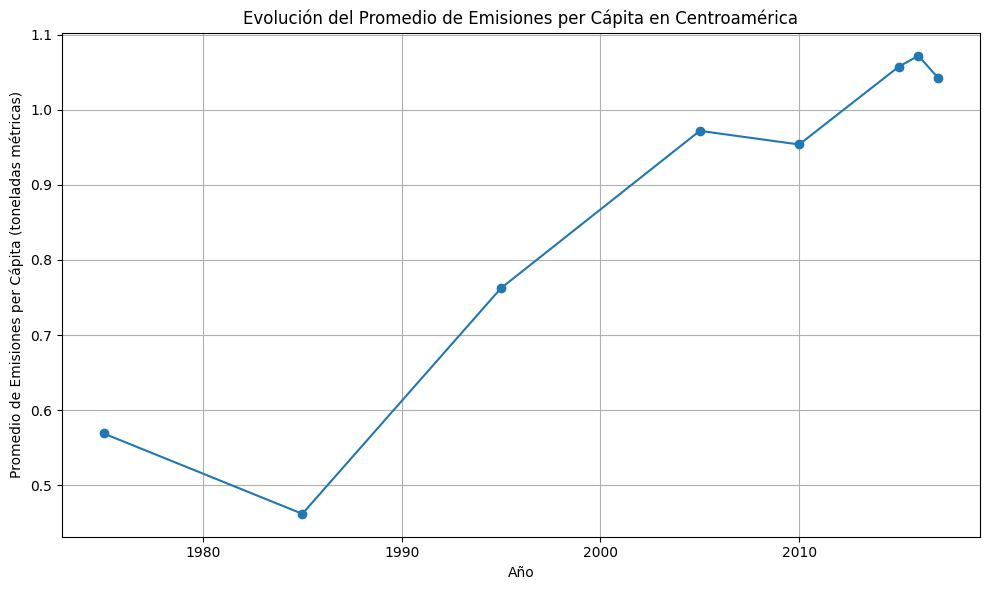

In [19]:
# Coloque el código que responda a la pregunta aqui exactamente lo que se pregunta
import matplotlib.pyplot as plt #Se importa libreria matplotlib

# Lista de países de Centroamérica
paises_centroamerica = ['El Salvador', 'Honduras', 'Guatemala', 'Costa Rica', 'Nicaragua']

# Filtrar datos per cápita solo para esos países
df_centroamerica_per_capita = df_emisions_co2_per_capita[df_emisions_co2_per_capita['Country'].isin(paises_centroamerica)]

# Calcular promedio por año
reporte_promedio_centroamerica = df_centroamerica_per_capita.groupby('Year')['Value'].mean().reset_index()
reporte_promedio_centroamerica.columns = ['Year', 'promedio_por_año']
#print(reporte_promedio_centroamerica)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(reporte_promedio_centroamerica['Year'], reporte_promedio_centroamerica['promedio_por_año'], marker='o')
plt.title('Evolución del Promedio de Emisiones per Cápita en Centroamérica')
plt.xlabel('Año')
plt.ylabel('Promedio de Emisiones per Cápita (toneladas métricas)')
plt.grid(True)
plt.tight_layout()
plt.show()
